### Introduction

The objective of this experiment is to predict the probability of default payment from the given dataset. This dataset is downloaded from the UCI ML Datasets.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as   
  follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the     repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment  
  delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay   for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of  
  bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 
  2005; . . .;X23 = amount paid in April, 2005.
  
  
Citation Request: : Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

Dataset downloaded from here

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("./credit_card_TRAIN.csv", skiprows=1)
test = pd.read_csv("./credit_card_TEST.csv", skiprows=1)
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Data Cleaning

Some of the columns in Dataframe are having extravalues. So we can change those values to within the limit. For ex. 

EDUCATION has 7 unique values instead of 4
MARRIAGE has 4 unique values instead of 3

In [3]:
train.EDUCATION.value_counts()

2    10634
1     7982
3     3581
5      184
4       76
6       33
0       10
Name: EDUCATION, dtype: int64

According to the description we should have values 1,2,3,4. So we can change 0,5,6 to 4

In [4]:
train.EDUCATION[train.EDUCATION == 0] = 4
train.EDUCATION[train.EDUCATION == 5] = 4
train.EDUCATION[train.EDUCATION == 6] = 4

In [5]:
train.EDUCATION.value_counts()

2    10634
1     7982
3     3581
4      303
Name: EDUCATION, dtype: int64

According to the description for Marriage we should have values 1,2,3. So we will change 0 to 3

In [6]:
train.MARRIAGE.value_counts()

2    12219
1     9990
3      255
0       36
Name: MARRIAGE, dtype: int64

In [7]:
train.MARRIAGE[train.MARRIAGE == 0] = 3

In [8]:
train.MARRIAGE.unique()

array([1, 2, 3])

In [9]:
train["default payment next month"].value_counts()

0    17412
1     5088
Name: default payment next month, dtype: int64

### Data Modeling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#x contains features information
#y contains label information


X = train.drop(["default payment next month"], axis=1)
y = train["default payment next month"]

### Data Preprocessing

Pre-processing refers to the transformations applied to your data before feeding it to the algorithm. In python, scikit-learn library has a pre-built functionality under sklearn.preprocessing. There are many more options for pre-processing which we’ll explore

### Feature Scaling

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. It is performed on continuous variables. Lets plot the distribution of all the continuous variables in  the data set.

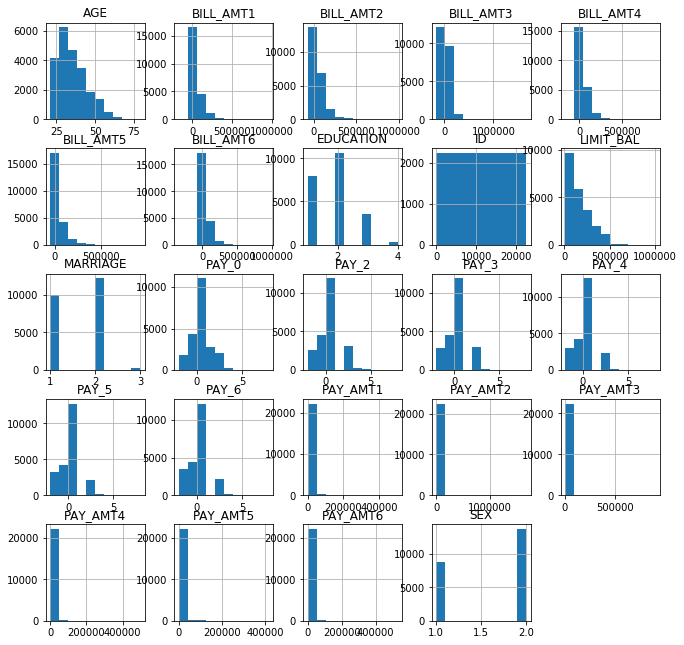

In [11]:
import matplotlib.pyplot as plt
X[X.dtypes[(X.dtypes=='float64') | (X.dtypes=='int64')].index.values].hist(figsize=[11,11])
plt.show()

After understanding these plots we infer that 'Age' is in the scale of 25 - 75, where as 'PAY_AMT' is in the scale of 0-5000

This is variance is beacause the Age is in years and Pay Amount is in dollars

### Feature Standardization

Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean. Standard scores (also called z scores) of the samples are calculated as follows : 

In [12]:
# Importing stanardize scalar and initializing it
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

# Scaling for all the features
X = scalar.fit(X).transform(X)


#### Splitting the data for Training and Testing

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(18000, 24) (18000,)
(4500, 24) (4500,)


In [14]:
y_test.value_counts()

0    3508
1     992
Name: default payment next month, dtype: int64

#### Running the Classifier to look at model accuracy

In [15]:
clf = LogisticRegression()
clf.fit(x_train, y_train) #train the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Find the Model Accuracy

In [16]:
clf_score = clf.score(x_test, y_test)

In [17]:
print(clf_score)

0.8053333333333333


#### prediction on Test Data

In [18]:
clf_predict = clf.predict(x_test)
print(clf_predict[:5])

[0 0 0 0 0]


#### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
clf_confusematrix = confusion_matrix(y_test, clf_predict, labels=[1,0])
clf_confusematrix

array([[ 235,  757],
       [ 119, 3389]])

<ul> True Positive(TP)   : 235 Default Payments predicted correctly outof 992</ul>
<ul> False Positive (FP) : 119 Non-Default Payments predicted as Default payments</ul>
<ul> False Negative (FN) : 757 Default payments are predicted as Non-Default payments</ul>
<ul> True Negative (TN)  : 3389 Default payments predicted correctly outof 3508</ul>

#### Precision and Recall

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_predict, target_names=['non_default', 'default']))

              precision    recall  f1-score   support

 non_default       0.82      0.97      0.89      3508
     default       0.66      0.24      0.35       992

    accuracy                           0.81      4500
   macro avg       0.74      0.60      0.62      4500
weighted avg       0.78      0.81      0.77      4500



#### ROC Curve - AUC

In [21]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(y_test, clf_predict)

#area under the curve
roc_auc = auc(fpr, tpr)
print(fpr)
print(roc_auc)

[0.         0.03392246 1.        ]
0.6014863491742377


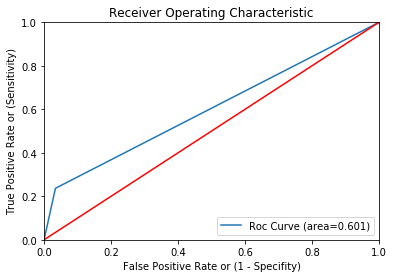

In [22]:
#plot roc curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='Roc Curve (area=%0.3f)' %roc_auc)
plt.plot([0,1], [0,1], 'red') #random prediction curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The objective of the model is to predict the default payment for the next month, but the model performence is poor for this dataset.  

### Assignment - 1

In [26]:
# Count the total missing values in the dataset

### Assignment - 2

In [27]:
# Check the duplicates in the data